# Simple fillable year calendar

Sometimes when attempting to consistently do a thing, it can feel nice to manually track progress. 

I've made a very minimalist calendar to that end, meant to be printed out. 

By default, it differentiates weekdays and weekends for easier counting. 

By default, it plots 2023, but it can plot any year, given a target year and the weekday of the first day of that year as integer (monday = 1 and so on).

The colors, shapes, and relative sizes of the day markers are customizable, as is the label. 

I've made a few examples, saved as .jpgs in the `examples/` folder. 

If you use it, I hope it's constructive and/or fun.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['Gill Sans']
rcParams['font.monospace'] = ['Menlo']   
rcParams['axes.linewidth'] = 4 # calendar border

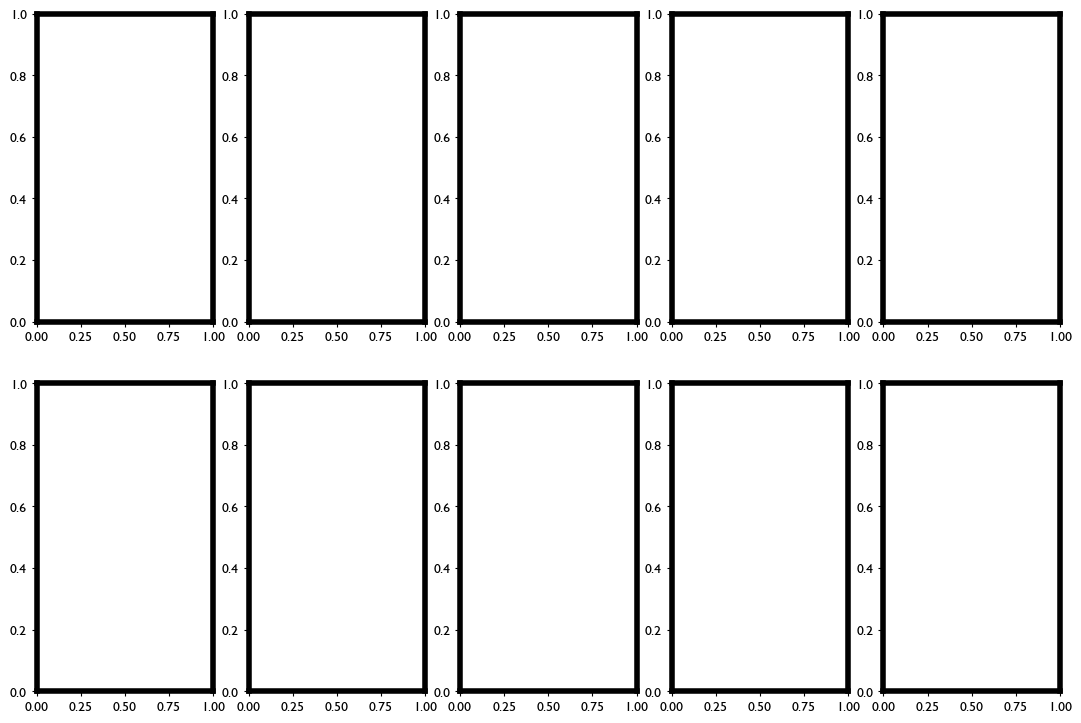

In [2]:
fact = 1.1
fig, axs = plt.subplots(2,5, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [4]:
def dayDotPlotter(yr = 2023, firstDayOfYear = 7, 
                  weekdayShape = 's', weekendShape = 'o', weekdayColor = 'slategrey', \
                  weekendColor = '#1F18C0', weekendOffset = 0.5, \
                  annot = '', ffamily = 'sans-serif', fname = './examples/default2023.jpg'):

    '''
    a simple day plotter. by default, it will plot the days of 2023, differentiating weekends. 
    
    optional arguments:
    
    yr -- int, year to make a calendar for, 2023 as default
    firstDayOfYear -- int, first day of year, 
        Monday = 1, Sunday = 7; 7 (for Sunday, 2023-01-01, as default)
    weekdayShape -- string, shape of weekday marker
        square by default: https://matplotlib.org/stable/api/markers_api.html
    weekendShape -- circle by default
    weekdayColor -- string, color of weekday marker
        hex or named color: https://matplotlib.org/2.0.2/examples/color/named_colors.html
    weekendColor -- string, as above
        #1F18C0 (International Klein Blue) by default
    weekendOffset -- float, size increase in weekend marker from weekday one
        1.5 by default
    annot -- string, anything that goes before the year in the bottom right
        eg "RUNS" for "RUNS 2023"; empty by default
    ffamily -- string defining font family
        'sans-serif' is default, set to Gill Sans, 
        'monospace' is also defined, set to Menlo
    fname -- string, path and file name for saving
        ./examples/default2023.jpg' by default
    '''
    
    leap = False
    frog = yr%4 
    if frog == 0:
        leap = True #yrs divisible by 4 are leap
    #establish days of year and day-of-week of first day of year. 
    if not leap:
        daysInMonth = np.array([31,28,31,30,31,30,31,31,30,31,30,31]) 
        dayInYear = 365 
    if leap:
        daysInMonth = np.array([31,29,31,30,31,30,31,31,30,31,30,31])
        dayInYear = 366

    dayOfYear = np.arange(1,dayInYear+1,1)
    dayOfMonth = np.copy(dayOfYear)
    Month = np.copy(dayOfYear)

    starts = np.zeros_like(daysInMonth)
    ends = np.zeros_like(starts)
    #get array of days of month
    MonthTemplate = np.arange(1,32,1)
    for i in range(0,12):
        starts[i] = np.sum(daysInMonth[0:i])
        ends[i] = np.sum(daysInMonth[0:i+1])
        Month[starts[i]:ends[i]] = i+1 #month
        dayOfMonth[starts[i]:ends[i]] = MonthTemplate[0:daysInMonth[i]]

    a = np.arange(1,8,1) #day of week template, monday = 1, sunday = 7
    dayOfWeekTemplate = np.tile(a, 54)
    dayOfWeek2023 = dayOfWeekTemplate[firstDayOfYear-1:firstDayOfYear+dayInYear-1] 
    
    try:
    #font family for plotting:
        rcParams['font.family'] = ffamily # font family
    except:
        pass
    
    ts = 13 #fontsize for 
    
    fact = 1.5
    ms = 6.9 # weekday marker size
    #fig, ax = plt.subplots(1,1, figsize=(5*fact, 3*fact), facecolor='w', edgecolor='w')
    fig, ax = plt.subplots(1,1, figsize=(6, 4), facecolor='w', edgecolor='w')
    for i in range(0,dayInYear):
        tday = dayOfWeek2023[i]
        if tday <=5:
            ax.plot(dayOfMonth[i],Month[i], marker = weekdayShape, \
                        markerfacecolor = 'w', markeredgecolor = weekdayColor, markersize = ms, markeredgewidth = 1)
        else:
            ax.plot(dayOfMonth[i],Month[i], marker = weekendShape, \
                        markerfacecolor = 'w', markeredgecolor = weekendColor, markersize = ms + weekendOffset, markeredgewidth = 1.5)
    for i in range(1,13):
        ax.text(-1,i+0.2, f'{i}', color =weekendColor, fontsize = ts)

    ax.plot(-10,-10, marker = weekendShape, markerfacecolor = weekendColor, \
            linestyle = '', markeredgecolor = weekendColor, markersize = 12, label = f'{annot} {yr}')
    

    ax.tick_params(color=weekendColor, labelcolor=weekendColor)
    for spine in ax.spines.values():
        spine.set_edgecolor(weekendColor)

    margin = 1.5    
    ax.set_xlim([-2,33.5])
    ax.set_ylim([1-margin,12+margin+1])
    ax.invert_yaxis()
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.legend(loc = 'lower right', frameon = False, labelcolor = weekendColor, fontsize = ts+4)
    plt.tight_layout()
    plt.show()
    fig.savefig(fname, dpi = 300)
    
    

#### here's the default calendar that dayDotPlotter makes:

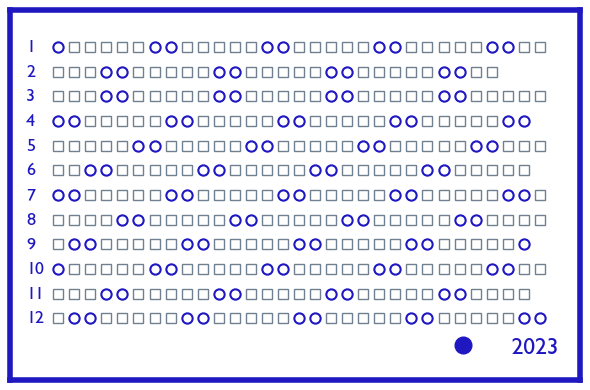

In [5]:
dayDotPlotter()

### here is the default for 2025

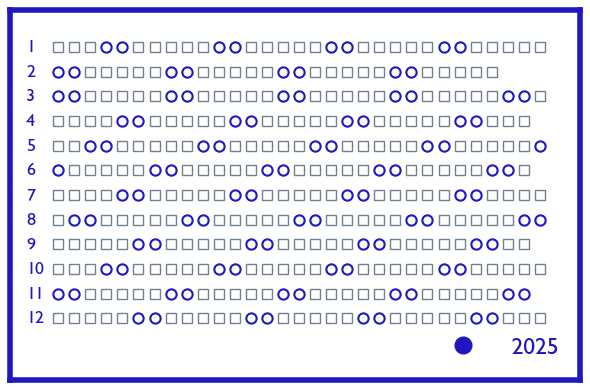

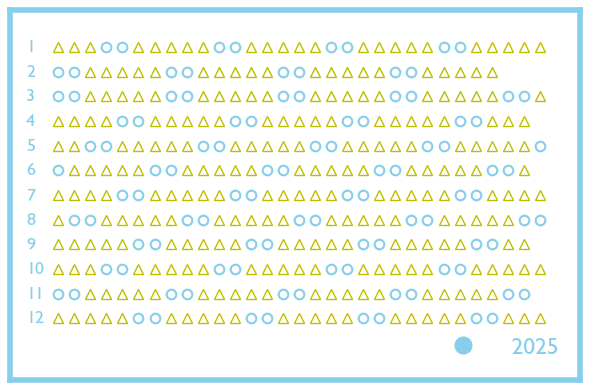

In [20]:
yr = 2025; firstDayOfYear = 3; fname = './examples/default2025.jpg'
dayDotPlotter(yr, firstDayOfYear, fname = fname)

weekdayShape = '^'
weekendShape = 'o'
weekdayColor = 'y'
weekendColor = 'skyblue'
weekendOffset = 0
# annot = 'OSOBNÍ DENÍK'
fname = './examples/sweden2025.jpg'
dayDotPlotter(yr = yr, firstDayOfYear = firstDayOfYear, weekdayShape = weekdayShape, weekendShape = weekendShape, \
             weekdayColor = weekdayColor, weekendColor = weekendColor, \
             weekendOffset = weekendOffset, fname = fname )

#### it has multiple optional arguments that allow for customization of the calendar

They are easily accessible with the help() function:

In [7]:
help(dayDotPlotter)

Help on function dayDotPlotter in module __main__:

dayDotPlotter(yr=2023, firstDayOfYear=7, weekdayShape='s', weekendShape='o', weekdayColor='slategrey', weekendColor='#1F18C0', weekendOffset=0.5, annot='', ffamily='sans-serif', fname='./examples/default2023.jpg')
    a simple day plotter. by default, it will plot the days of 2023, differentiating weekends. 
    
    optional arguments:
    
    yr -- int, year to make a calendar for, 2023 as default
    firstDayOfYear -- int, first day of year, 
        Monday = 1, Sunday = 7; 7 (for Sunday, 2023-01-01, as default)
    weekdayShape -- string, shape of weekday marker
        square by default: https://matplotlib.org/stable/api/markers_api.html
    weekendShape -- circle by default
    weekdayColor -- string, color of weekday marker
        hex or named color: https://matplotlib.org/2.0.2/examples/color/named_colors.html
    weekendColor -- string, as above
        #1F18C0 (International Klein Blue) by default
    weekendOffset -- floa

#### here are some examples of simple variations (for year 2023)

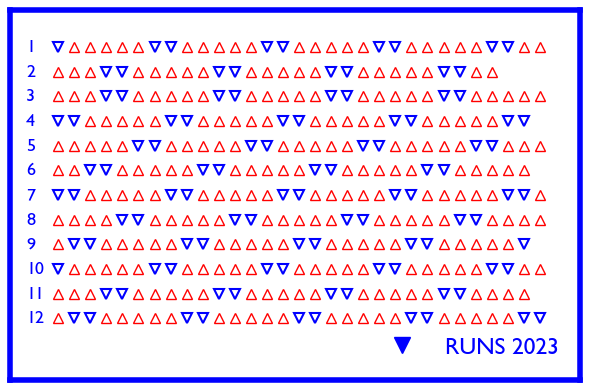

In [8]:
weekdayShape = '^'
weekendShape = 'v'
weekdayColor = 'r'
weekendColor = 'b'
weekendOffset = 0
annot = 'RUNS'
fname = './examples/triRUNS2023.jpg'
dayDotPlotter(weekdayShape = weekdayShape, weekendShape = weekendShape, \
             weekdayColor = weekdayColor, weekendColor = weekendColor, \
             weekendOffset = weekendOffset, annot = annot, fname = fname )

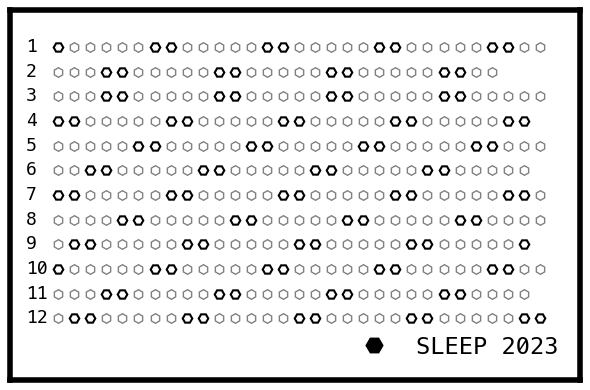

In [9]:
weekdayShape = 'h'
weekendShape = 'H'
weekdayColor = 'grey'
weekendColor = 'k'
weekendOffset = 0
annot = 'SLEEP'
ffamily = 'monospace'
fname = './examples/monosleep2023.jpg'
dayDotPlotter(weekdayShape = weekdayShape, weekendShape = weekendShape, \
             weekdayColor = weekdayColor, weekendColor = weekendColor, \
             weekendOffset = weekendOffset, annot = annot, fname = fname, ffamily = ffamily)

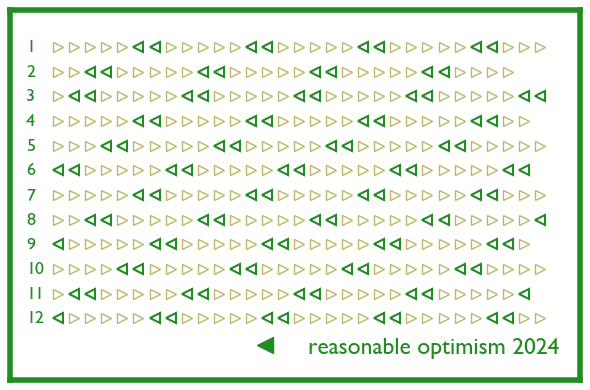

In [10]:
yr = 2024
firstDayOfYear = 1
weekdayShape = '>'
weekendShape = '<'
weekdayColor = 'darkkhaki'
weekendColor = 'forestgreen'
weekendOffset = 1
annot = 'reasonable optimism'
fname = './examples/optimism2024.jpg'
dayDotPlotter(yr = yr, firstDayOfYear = 1, 
              weekdayShape = weekdayShape, weekendShape = weekendShape, \
             weekdayColor = weekdayColor, weekendColor = weekendColor, \
             weekendOffset = weekendOffset, annot = annot, fname = fname)

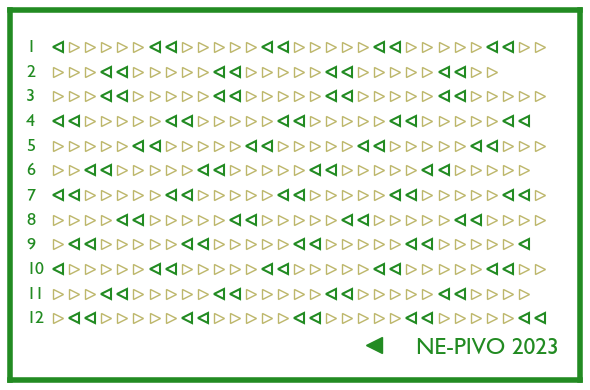

In [11]:
# weekdayShape = '^'
# weekendShape = 'v'
# weekdayColor = 'r'
# weekendColor = 'b'
weekendOffset = 0
annot = 'NE-PIVO'
fname = './examples/NE-PIVO2023.jpg'
dayDotPlotter(weekdayShape = weekdayShape, weekendShape = weekendShape, \
             weekdayColor = weekdayColor, weekendColor = weekendColor, \
             weekendOffset = weekendOffset, annot = annot, fname = fname )

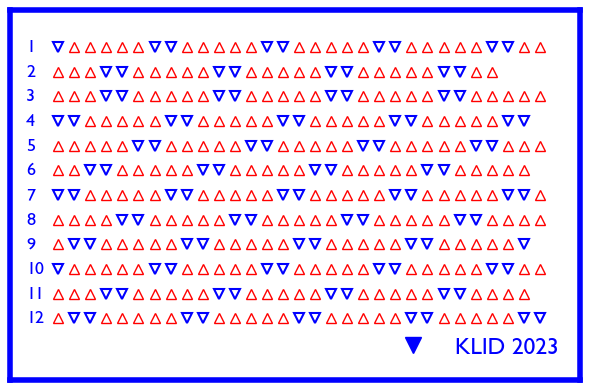

In [12]:
weekdayShape = '^'
weekendShape = 'v'
weekdayColor = 'r'
weekendColor = 'b'
weekendOffset = 0
annot = 'KLID'
fname = './examples/KLID2023.jpg'
dayDotPlotter(weekdayShape = weekdayShape, weekendShape = weekendShape, \
             weekdayColor = weekdayColor, weekendColor = weekendColor, \
             weekendOffset = weekendOffset, annot = annot, fname = fname )

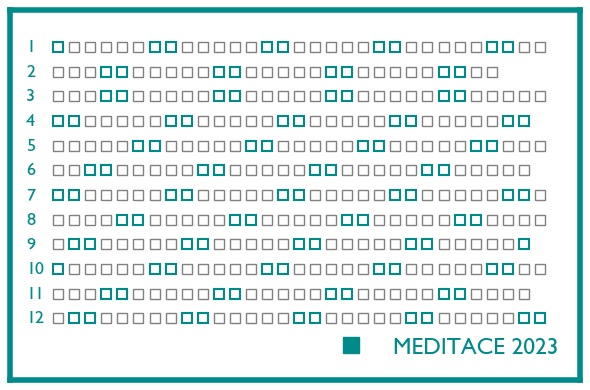

In [13]:
weekdayShape = 's'
weekendShape = 's'
weekdayColor = 'grey'
weekendColor = 'darkcyan'
weekendOffset = 1
annot = 'MEDITACE'
fname = './examples/MEDITACE2023.jpg'
dayDotPlotter(weekdayShape = weekdayShape, weekendShape = weekendShape, \
             weekdayColor = weekdayColor, weekendColor = weekendColor, \
             weekendOffset = weekendOffset, annot = annot, fname = fname )

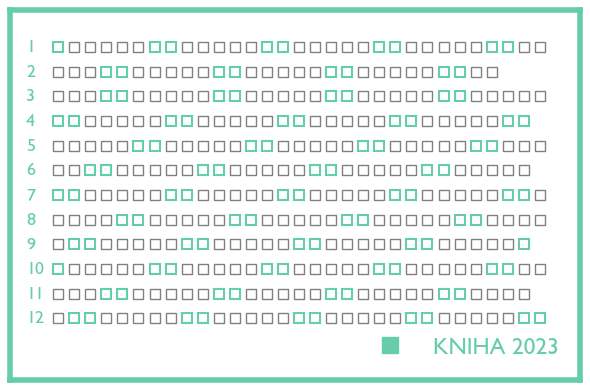

In [14]:
weekdayShape = 's'
weekendShape = 's'
weekdayColor = 'grey'
weekendColor = 'mediumaquamarine'
weekendOffset = 0
annot = 'KNIHA'
fname = './examples/KNIHA2023.jpg'
dayDotPlotter(weekdayShape = weekdayShape, weekendShape = weekendShape, \
             weekdayColor = weekdayColor, weekendColor = weekendColor, \
             weekendOffset = weekendOffset, annot = annot, fname = fname )

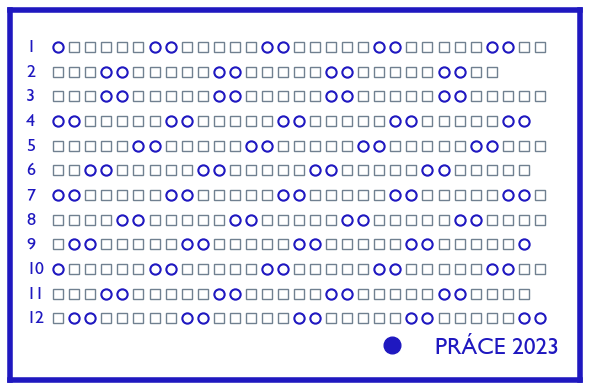

In [15]:
# weekdayShape = 'o'
# weekendShape = 'o'
# weekdayColor = 'grey'
# weekendColor = 'mediumaquamarine'
# weekendOffset = 0
annot = 'PRÁCE'
fname = './examples/PRACE2023.jpg'
dayDotPlotter( annot = annot, fname = fname )

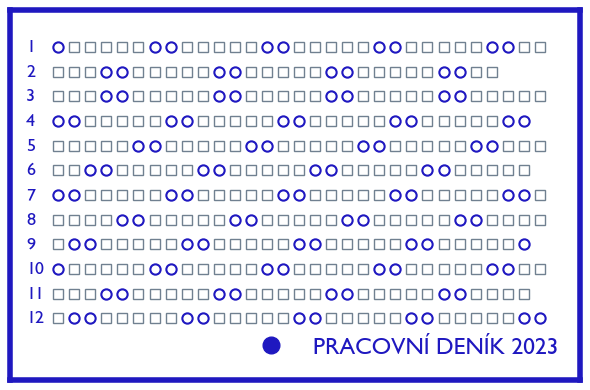

In [16]:
# weekdayShape = 'o'
# weekendShape = 'o'
# weekdayColor = 'grey'
# weekendColor = 'mediumaquamarine'
# weekendOffset = 0
annot = 'PRACOVNÍ DENÍK'
fname = './examples/PRACDEN2023.jpg'
dayDotPlotter( annot = annot, fname = fname )

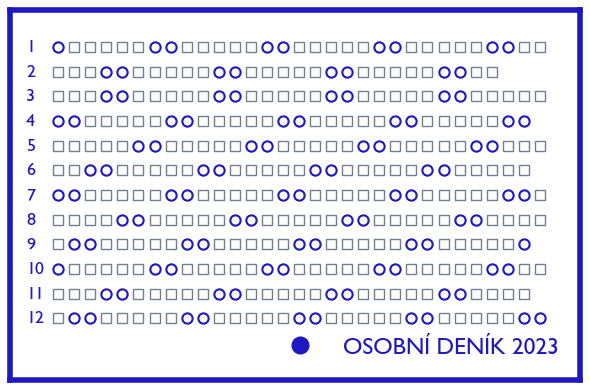

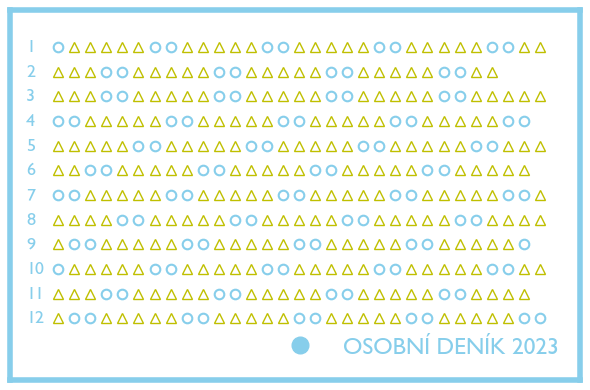

In [17]:
weekdayShape = '^'
weekendShape = 'o'
weekdayColor = 'y'
weekendColor = 'skyblue'
weekendOffset = 0
annot = 'OSOBNÍ DENÍK'
fname = './examples/OSDEN2023.jpg'
dayDotPlotter( annot = annot, fname = fname )
dayDotPlotter(weekdayShape = weekdayShape, weekendShape = weekendShape, \
             weekdayColor = weekdayColor, weekendColor = weekendColor, \
             weekendOffset = weekendOffset, annot = annot, fname = fname )